In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method used for classification and regression. In this example, we'll focus on the classification case. The input consists of the k closest training examples in a data set. When k-NN is used for classification, the output reflects a class membership. Typically, an object is classified by way of a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import data.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We need to split the dataset into its attributes and labels.

In [3]:
X = dataset.iloc[:, :-1].values #Take out the last column
y = dataset.iloc[:, 4].values #Keep the 5th coulumn

We split the dataset into train and test data.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. Thus, it is always a good practice to normalize data before proceeding training and predictions.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now, we train data using the KNeighborsClassifier.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #K has been specified as 5
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Making predictions.

In [7]:
y_pred = classifier.predict(X_test)

Model evaluation using confusion matrix, precision, recall and f1 score.

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 13  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



Results indicate that the algorithm classified all the 30 records in the test set with 100% accuracy.

Since there is no way to know beforehand which value of K that yields the best results in the first go, 5 was randomly chosen as the K value.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Next, we plot the error values against K values.

Text(0, 0.5, 'Mean Error')

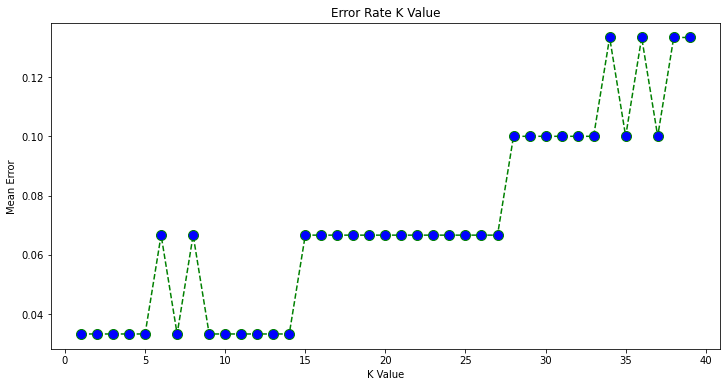

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

We can see that the mean error is zero at 5, 7,9 through 15.

Good resources:
- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
- https://scikit-learn.org/stable/modules/neighbors.html 
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm